In [1]:
from IPython.core.display import HTML
with open ("../style.css", "r") as file:
    css = file.read()
HTML(css)

# Simple Linear Regression

We need to read our data from a <tt>csv</tt> file.  The module `csv` offers a number of functions for reading and writing a <tt>csv</tt> file.

In [2]:
import csv

The data we want to read is contained in the <tt>csv</tt> file `cars.csv`, which is located in the subdirectory `Python`.  In this file, the first column has the *miles per gallon*, while the *engine displacement* is given in the third column.  On MacOs and Linux systems we can peek at this file via the next cell. 

In [3]:
!cat cars.csv

mpg,cyl,displacement,hp,weight,acc,year,name
18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,ford torino
15.0,8,429.0,198.0,4341.0,10.0,70,ford galaxie 500
14.0,8,454.0,220.0,4354.0,9.0,70,chevrolet impala
14.0,8,440.0,215.0,4312.0,8.5,70,plymouth fury iii
14.0,8,455.0,225.0,4425.0,10.0,70,pontiac catalina
15.0,8,390.0,190.0,3850.0,8.5,70,amc ambassador dpl
15.0,8,383.0,170.0,3563.0,10.0,70,dodge challenger se
14.0,8,340.0,160.0,3609.0,8.0,70,plymouth 'cuda 340
15.0,8,400.0,150.0,3761.0,9.5,70,chevrolet monte carlo
14.0,8,455.0,225.0,3086.0,10.0,70,buick estate wagon 
24.0,4,113.0,95.00,2372.0,15.0,70,toyota corona mark ii
22.0,6,198.0,95.00,2833.0,15.5,70,plymouth duster
18.0,6,199.0,97.00,2774.0,15.5,70,amc hornet
21.0,6,200.0,85.00,2587.0,16.0,70,ford maverick
27.0,4,97.00,88.00,2130.0,1

On Windows systems we have to execute the cell below instead.

In [ ]:
!type cars.csv

In order to read the file we use the method `DictReader` from the module [csv](https://docs.python.org/3/library/csv.html).
The `DictReader` returns a dictionary for every row of the `csv` file.  The keys of this dictionary are the column headers of the `csv` file.
When reading this file, we convert *miles per gallon* into *km per litre* and *cubic inches* into *litres*.

In [4]:
with open('cars.csv') as handle:
    reader       = csv.DictReader(handle, delimiter=',')
    kpl          = [] # kilometer per litre
    displacement = [] # engine displacement
    for row in reader:
        x = float(row['displacement']) * 0.0163871
        y = float(row['mpg']) * 1.60934 / 3.78541
        print(f'{row["name"]:35s}: displacement = {x:5.2f} litres, kpl = {y:5.2f} km per litres')
        displacement.append(x)  
        kpl         .append(y)

chevrolet chevelle malibu          : displacement =  5.03 litres, kpl =  7.65 km per litres
buick skylark 320                  : displacement =  5.74 litres, kpl =  6.38 km per litres
plymouth satellite                 : displacement =  5.21 litres, kpl =  7.65 km per litres
amc rebel sst                      : displacement =  4.98 litres, kpl =  6.80 km per litres
ford torino                        : displacement =  4.95 litres, kpl =  7.23 km per litres
ford galaxie 500                   : displacement =  7.03 litres, kpl =  6.38 km per litres
chevrolet impala                   : displacement =  7.44 litres, kpl =  5.95 km per litres
plymouth fury iii                  : displacement =  7.21 litres, kpl =  5.95 km per litres
pontiac catalina                   : displacement =  7.46 litres, kpl =  5.95 km per litres
amc ambassador dpl                 : displacement =  6.39 litres, kpl =  6.38 km per litres
dodge challenger se                : displacement =  6.28 litres, kpl =  6.38 km

Now `kpl` is a list of floating point numbers specifying the 
<em style="color:blue;">fuel efficiency</em>, while the list `displacement` 
contains the corresponding <em style="color:blue;">engine displacements</em> 
measured in litres.  We display these values for the first 5  cars.

In [5]:
kpl[:5]

[7.652571319883447,
 6.3771427665695395,
 7.652571319883447,
 6.802285617674175,
 7.227428468778811]

In [6]:
displacement[:5]

[5.0308397000000005,
 5.735485000000001,
 5.2110978,
 4.981678400000001,
 4.9489042]

The number of data pairs of the form $\langle x, y \rangle$ that we have read is stored in the variable `m`.

In [7]:
m = len(displacement)
m

392

In order to be able to plot the *fuel efficiency* versus the *engine displacement* we turn the 
lists `displacement` and `mpg` into `numpy` arrays.  This is also usefull in order to compute the coefficients $\vartheta_0$ and $\vartheta_1$ later.

In [8]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

Since <em style="color:blue;">kilometres per litre</em> is the **inverse** of the fuel consumption, the vector `Y` is defined as follows:

In [9]:
X = np.array(displacement)

In [10]:
Y = np.array([100 / y for y in kpl])

Text(0.5, 1.0, 'Fuel Consumption vs. Engine Displacement')

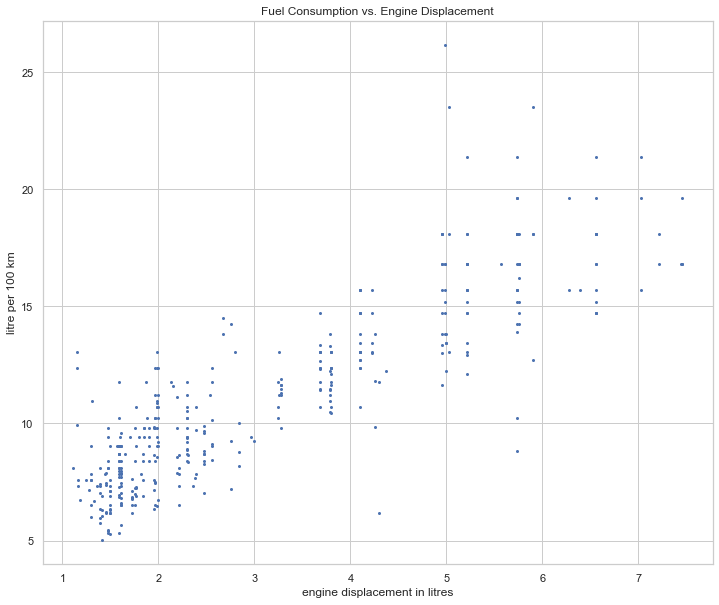

In [11]:
plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')
plt.scatter(X, Y, c='b', s=4) # 'b' is short for blue
plt.xlabel('engine displacement in litres')
plt.ylabel('litre per 100 km')
plt.title('Fuel Consumption vs. Engine Displacement')

We compute the average engine displacement according to the formula:
$$ \bar{\mathbf{x}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m x_i $$ 

In [12]:
xMean = np.mean(X)
xMean

3.185848717984694

We compute the average fuel consumption according to the formula:
$$ \bar{\mathbf{y}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m y_i $$ 

In [13]:
yMean = np.mean(Y)
yMean

11.24855510842273

The coefficient $\vartheta_1$ is computed according to the formula:
$$ \vartheta_1 = \frac{\sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr) \cdot \bigl(y_i - \bar{\mathbf{y}}\bigr)}{
                       \sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr)^2}  
$$

In [14]:
ϑ1 = np.sum((X - xMean) * (Y - yMean)) / np.sum((X - xMean) ** 2)
ϑ1

1.9766520631043467

The coefficient $\vartheta_0$ is computed according to the formula:
$$ \vartheta_0 = \bar{\mathbf{y}} - \vartheta_1 \cdot \bar{\mathbf{x}} $$ 

In [15]:
ϑ0 = yMean - ϑ1 * xMean
ϑ0

4.951240667279946

Let us plot the line $y(x) = ϑ0 + ϑ1 \cdot x$ together with our data:

Text(0.5, 1.0, 'Fuel Consumption versus Engine Displacement')

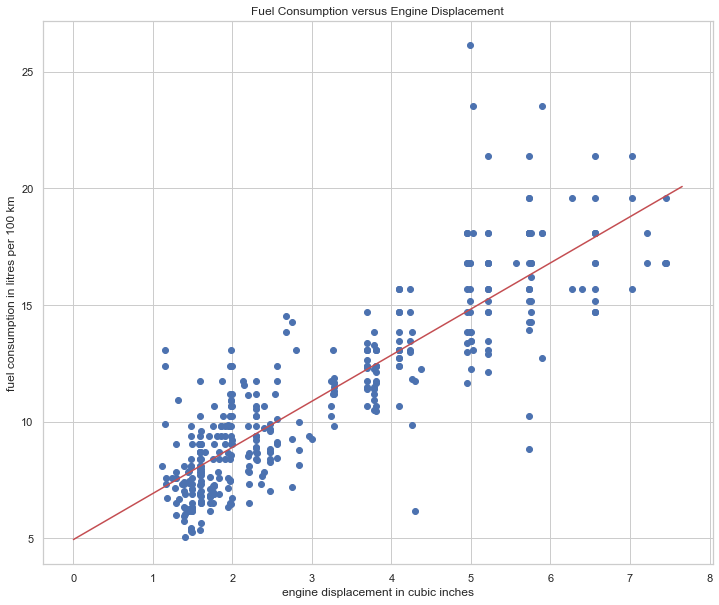

In [16]:
xMax = max(X) + 0.2
plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')
plt.scatter(X, Y, c='b')
plt.plot([0, xMax], [ϑ0, ϑ0 + ϑ1 * xMax], c='r')
plt.xlabel('engine displacement in cubic inches')
plt.ylabel('fuel consumption in litres per 100 km')
plt.title('Fuel Consumption versus Engine Displacement')

We see there is quite a bit of variation and apparently the engine displacement explains only a part of the fuel consumption.  In order to compute the coefficient of determination, i.e. the statistics $R^2$, we first compute the *total sum of squares* `TSS`according to the following formula:
$$ \mathtt{TSS} := \sum\limits_{i=1}^m \bigl(y_i - \bar{\mathbf{y}}\bigr)^2 $$

In [17]:
TSS = np.sum((Y - yMean) ** 2)
TSS

5989.413625506393

Next, we compute the *residual sum of squares* `RSS` as follows:
$$ \mathtt{RSS} := \sum\limits_{i=1}^m \bigl(\vartheta_1 \cdot x_i + \vartheta_0 - y_i\bigr)^2 $$
    

In [18]:
RSS = np.sum((ϑ1 * X + ϑ0 - Y) ** 2)
RSS

1497.0994440627935

Now $R^2$ is calculated via the formula:
$$ R^2 = 1 - \frac{\mathtt{RSS}}{\mathtt{TSS}}$$

In [19]:
R2 = 1 - RSS/TSS
R2

0.7500424018659728

It seems that about $75\%$ of the fuel consumption is explained by the engine displacement.  We can get a better model of the fuel consumption if we use more variables for explaining the fuel consumption.  For example, the weight of a car is also responsible for its fuel consumption.